## Simple Linear Regression


## Task-1
Prediction of Marks of a student based on the number of Study Hours.


In [2]:
# Importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn.linear_model import LinearRegression  

%matplotlib inline

In [3]:
# Reading CSV File
df = pd.read_csv("studentscores.csv")

In [7]:
print(df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


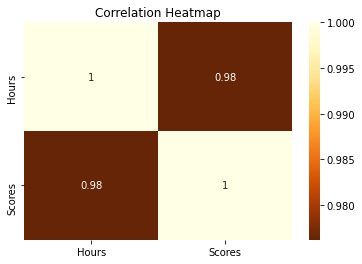

In [11]:
# Correlation Heatmap of our Data
sns.heatmap(df.corr(), cmap="YlOrBr_r", annot=True)
plt.title("Correlation Heatmap")
plt.show()

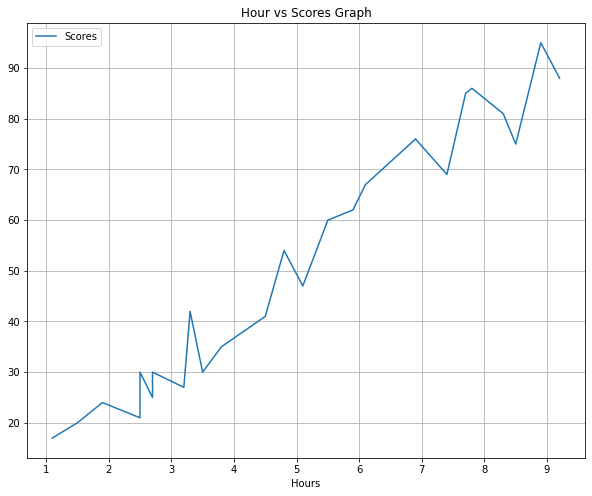

In [10]:
# Line plot of the Data.
df2 = df.sort_values(['Hours', 'Scores'])
df2.plot(x = "Hours", y = "Scores", figsize = (10,8), grid = True)
plt.title("Hour vs Scores Graph")
plt.show()

In [13]:
X = df.iloc[:,0].values.reshape(-1,1)
y = df.iloc[:,1].values

In [14]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [16]:
#Training the model
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 


LinearRegression()

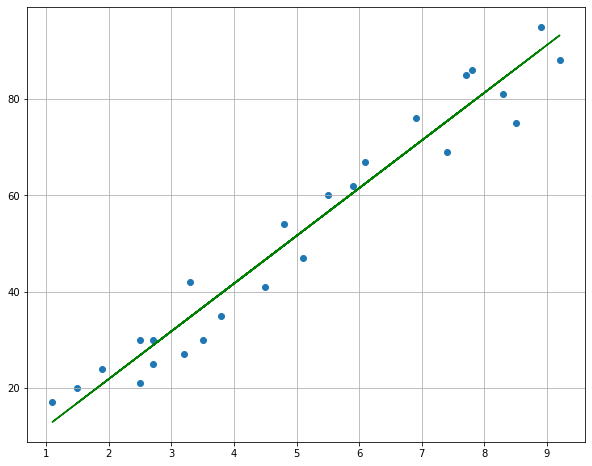

In [22]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.figure(figsize = (10,8))
plt.scatter(X, y)
plt.plot(X, line, color = "g")
plt.grid()
plt.show()

In [19]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [20]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [17]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Prediction Task

In [18]:
hours = 9.25
out = regressor.predict([[hours]])
print("Given No of Hours = {}".format(hours))
print("Score Predicted = {}".format(out[0]))

Given No of Hours = 9.25
Score Predicted = 93.69173248737535


### **Evaluating the model**

In [21]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
